In [69]:
from scipy import integrate
from integrate import lazy_integral
import numpy as np
import matplotlib.pyplot as plt

def function(u,z,R):
    """
    Function that when integrated gives the electric field
        -Inputs: u (float) Values at which we want to evaluate f
                 z (float) Position on the z-axis
                 R (float) Radius of the sphere, default to 1.0
        -Ouputs: the function value at u
    """
    return (z-R*u)/(R**2+z**2-2*R*z*u)**(3/2)

def Efield_dynamic(z,R,x_min,x_max,tolerance,nmax):
    """
    Compute the E-field using of the function using the adaptative simpson rule
        -Inputs: x_min (float) Lower bound of the integral
                 x_max (float) Upper bound of the integral
                 tolerance (float) Tolerance of the integration error
                 nmax (int) Maximal number of steps for the integral to converge
        -Ouputs:  
                 E_field (array) Electric field values from the interval 0 to 4
    """
    #Error handling for errors coming from the division by 0. This is because the electric field defined 
    #Inside the sphere (in this case, R=1) is 0, which would give us this division error.
    E_field = []
    for h in z:
        f = lambda x : function(x,h,R)
        try:
            val, dummy_counts = lazy_integral(f,x_min,x_max,tolerance,nmax)
        except:
            val = 0
        E_field.append(val)
    return E_field


#This is used to compare the "dynamic" integral from question 3 to a "theortical" integral. Integrate.quad 
#will be used from scipy to accomplish this.
def Efield_scipy(z,R,x_min, x_max):
    """
    Compute the E-field using of the function using the quadrature
         -Inputs: x_min (float) Lower bound of the integral
                  x_max (float) Upper bound of the integral
         -Outputs: E_field (array) using the quad function from scipy
    """
    Efield = []
    for h in z:
        f = lambda x : function(x,h,R)
        Efield.append(integrate.quad(f,x_min,x_max)[0])
    return Efield

C:\Users\joebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


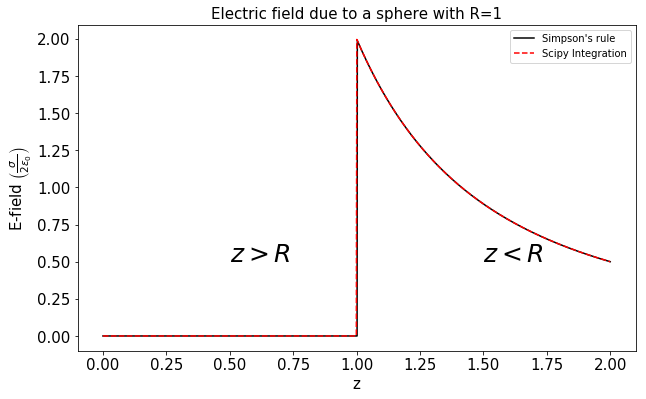

In [70]:
#Plotting stuff

#Defining the radius and the electric field from both methods of integration.
#Now we fix the value of R at 1 and let z go from 0 to 2

R = 1
x = np.linspace(0,2*R,2001)
Ef_homework = Efield_dynamic(x,R,-1,1,1e-7,1000)
Ef_scipy = Efield_scipy(x,R,-1,1)


#Matplotlib blah blah blah
fig,ax = plt.subplots(1,1,gridspec_kw={'height_ratios':[1]},figsize=(10,6))
ax.plot(x,Ef_homework,'-', label = 'Simpson\'s rule',color='black')
ax.plot(x,Ef_scipy, '--', label='Scipy Integration',color='red')
ax.set_ylabel(r'E-field $\left(\frac{\sigma}{2\varepsilon_0}\right)$',fontsize=15)
ax.set_xlabel('z',fontsize=15)
ax.tick_params(labelsize=15)
ax.text(R/2,max(Ef_scipy)/4,r'$z>R$',fontsize=25)
ax.text(R/2+R,max(Ef_scipy)/4,r'$z<R$',fontsize=25)

plt.title('Electric field due to a sphere with R={}'.format(R),fontsize=15)
plt.legend()
plt.show()


# Note: I adapted the integration result from Question 3 and compared it to the integration result
#       from scipy quad. 


#Another Note: 
#I put the electric filed in terms of units sigma/2epsilon_0 for the pure reason of laziness. 

#There is a singularity at u=1 when z=R. Scipy quad is not affected by this, but my integrator might be.
#Although it seems to be working now (I think), it's giving a good graph lol.